In [89]:
import networkx as nx
import random as random
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm
import pandas as pd


Armamos un código para generar una red aleatoria tipo Erdos Renyi, con $n$ cantidad de nodos
y probabilidad $p$. Este tipo de red consiste en simplemente tomar
$n$ nodos y enlazar cada par con una probabilidad $p$.

# Ejercicio 3
Consideramos una red de Erdos-Renyi de 3000 nodos conectados con una probabilidad $p=10^{-3}$

## a.
El numero esperado de enlaces es $\langle L \rangle = \frac{pn(n - 1)}{2} =  4498.5 $ 

Esto se debe a que la cantidad de enlaces $L$, si la probabilidad fuera 1, seria el número de combinaciones sin repetición de 2 elementos elegidos entre los n. Usando la formula de combinatoria esto termina siendo $n(n-1)/2$. Si luego en cada iteracion agregamos que $p<1$, el valor mas probable termina siendo $pn(n-1)/2$.


## b. 
¿En qué régimen de conectividad ubicaría a esta red?
Para encontrar en qué regimen de conectividad se ubica esta red necesitamos encontrar el $\langle k \rangle $ que esta determinado de la siguiente manera:

$$\langle k \rangle = 2 \frac{ \langle L \rangle } {N}= \frac{2pN(N - 1)}{2N} = p \cdot (N-1) = 2.999$$

Sabemos que el $k_c$ se encuentra en $\langle k \rangle = 1$ y que el regimen conectado comienza en $\langle k \rangle = ln(N) = 8.006$

Con lo cual esta red se encuentra en el regimen supercrítico pero por no llega a estar en el régimen conectado.

## c. 
Para estimar la probabilidad critica de esta red tenemos que toman en cuenta la cuenta anterior, con lo cual:

$$ \langle k_c \rangle  = p_c \cdot (N-1) = 1$$

$$ p_c = \frac{1}{N-1}= 3.33 \cdot 10^{-4}$$

##  d. 
Dada la probabilidad  $ p=10^{-3}$, el numero de nodos $N^*$ para el cual la red posee una unica componente es tal que el $ \langle k \rangle \ge ln(N)$ es decir que la red entra en el regimen conectado.  Con lo cual podemos obtener $N^*$ resolviendo la siguiente ecuación:

$$  \langle k^* \rangle  = p \cdot (N^*-1) \ge ln(N^*)$$

Es decir si buscamos el valor minimo de $N^*$, entonces:

$$ e^{p\cdot (N^*-1)} = N^*$$



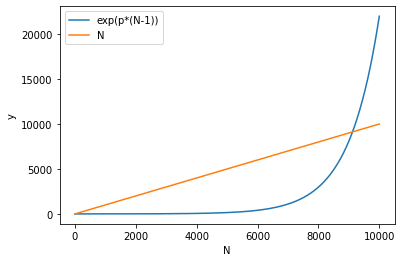

In [66]:
n = 3000 #cantidad de nodos
p = 10**(-3)
n_vect=np.arange(0,10000)
y_vect=np.exp(p*(n_vect-1))
plt.plot(n_vect,y_vect, label='exp(p*(N-1))')
plt.plot(n_vect,n_vect, label='N')
plt.xlabel('N')
plt.ylabel('y')
plt.legend()
plt.show()

El punto que queremos encontrar el el cruce que esta entre 8k y 10k, para eso lo vamos a hacer graficamente.

El valor de N que buscamos es el primer $N^*$ tal que $ e^{p\cdot (N^*-1)} - N^* \ge 0$


In [67]:
n_vect=np.arange(8000,10000)
y_vect=np.exp(p*(n_vect-1))
r_vect= y_vect-n_vect
r_index=np.where(r_vect >= 0)[0][0]
n_buscado=n_vect[r_index]
print(f'N*={n_buscado}')

N*=9120


Es decir que a partir de 9120 nodos, la red entraria en el regimen conectado y la fracion de enlaces pertenecientes a la componente gigante tendería exponencialmente a 1.

## e. 
Para la red anterior, el grado medio es el siguiente:
$$\langle k^* \rangle = p \cdot (N^*-1) = 9.120 \ge ln(N^*)$$
 y la distancia media $\langle d \rangle$ entre pares de nodos elegidos al azar es:
 $$\langle d \rangle = \frac{ln(N^*)}{N^*}= $$
# ??????? consultar con las demas el punto e

# Ejercicio 4
Veamos los resutados  obtenidos  en  los  puntos  (a),  (c)  y  (d)  del  problema  anterior  con simulaciones del ensemble de redes G(N,p)

In [50]:
#Inicialmente creo una funcion que devuelva cantidad de enlaces en funcion de n y p
def ErdosRenyi_m(n,p):
    m = 0
    #Itero sobre los pares i-j
    for i in range(n):
        for j in range(i+1,n):
            random_sample = random.random()
            if random_sample <= p:
                m+=1
    return(m)

#Creo una funcion que devuelve el listado de edges en funcion de n y p
def ErdosRenyi_edges(n,p):
    edges = []
    #Itero sobre los pares i-j
    for i in range(n):
        for j in range(i+1,n):
            random_sample = random.random()
            if random_sample <= p:
                edges.append((i,j))
    return(edges)

## Comparacion con el punto 3a.
Veamos la cantidad de enlaces para distintas iteraciones de este ensemble de $n=3000$ y $p=10^{-3}$

In [19]:
n = 3000 #cantidad de nodos
p = 10**(-3)

In [20]:
nIteraciones=100
nEnlaces=[]
for i in tqdm(range(nIteraciones)):
    nEnlaces.append(ErdosRenyi_m(n,p))

100%|██████████| 100/100 [00:41<00:00,  2.39it/s]


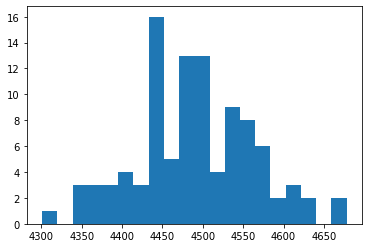

In [21]:
plt.hist(nEnlaces, bins =20)
plt.show()

In [29]:
nEnlaces_mean=np.mean(nEnlaces)
nEnlaces_std=np.std(nEnlaces)
nEnlaces_calculado=p*n*(n-1)/2
del nEnlaces
print(f'<L> calculado={nEnlaces_calculado}\n<L> simulado={nEnlaces_mean} +/- {np.round(nEnlaces_std,2)}')

NameError: name 'np' is not defined

El valor medio de enlaces calculado está dentro del intervalo de confianza alrededor del valor medio de enlaces simulado con una muestra de 100 iteraciones.

## Comparacion con el punto 3c.

De los calculos teoricos obtuvimos el resultado $ p_c = \frac{1}{N-1}= 3.33 \cdot 10^{-4}$

Para compararlo con las simulaciones lo que vamos a hacer es armar el grafico de la fraccion de nodos pertenecientes a la CG (S), en funcion de la probabilidad p.

Teniendo en cuenta que esto tipicamente se grafica en funcion de $\langle k \rangle $, primero recordemos la relacion entre $\langle kc \rangle $ y $p_c$:
$$ \langle k_c \rangle  = p_c \cdot (N-1) = 1$$

In [79]:
def ErdosRenyi_sizeGC(n,p):
    red=nx.empty_graph(n)
    red.add_edges_from(ErdosRenyi_edges(n,p))
    componentes=[red.subgraph(componente) 
                      for componente in sorted(nx.connected_components(red), 
                                               key=len, reverse=True)]
    del red
    gigante = componentes[0]
    del componentes
    frac_gigante=gigante.number_of_nodes()/n
    del gigante
    return(frac_gigante)

In [81]:
n = 3000 #cantidad de nodos
nProb=10
p_vect =  np.geomspace(10**(-4), 1, num=nProb)
sizeGC=[]
for p in tqdm(p_vect):
    sizeGC.append(ErdosRenyi_sizeGC(n,p))
    percent_used = getattr(psutil.virtual_memory(), 'percent')
    if percent_used > 80: print('breaking');break


100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


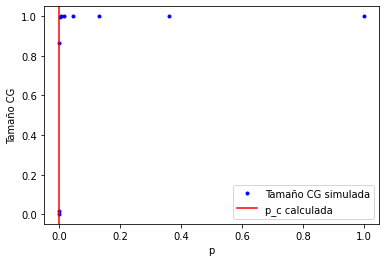

In [82]:
plt.plot(p_vect,sizeGC,'b.',label='Tamaño CG simulada')
plt.axvline(x=1/(n-1), color='red',label='p_c calculada')
plt.xlabel('p')
plt.ylabel('Tamaño CG')
plt.legend()
plt.show()

La probabilidad critica, que habiamos predecido que ocurría en $ 3.33 \cdot 10^{-4}$ parece ocurrir muy cercana a 0, vamos a graficar en el intervalo $\left \{ 10^{-4} , 10^{-3}\right \}$

In [83]:
n = 3000 #cantidad de nodos
nProb=100
p_vect =  np.geomspace(10**(-4), 10**(-3), num=nProb)
p_vect = np.repeat(p_vect,5)
sizeGC=[]
for p in tqdm(p_vect):
    sizeGC.append(ErdosRenyi_sizeGC(n,p))
    percent_used = getattr(psutil.virtual_memory(), 'percent')
    if percent_used > 80: print('breaking');break

100%|██████████| 500/500 [06:04<00:00,  1.37it/s]


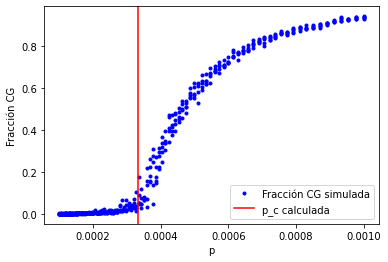

In [86]:
plt.plot(p_vect,sizeGC,'b.',label='Fracción CG simulada')
plt.axvline(x=1/(n-1), color='red',label='p_c calculada')
plt.xlabel('p')
plt.ylabel('Fracción CG')
plt.legend()
plt.show()

Para una mejor visualización de los datos vamos a promediar agrupando por p, ya que para cada p se usaron 5 muestras.

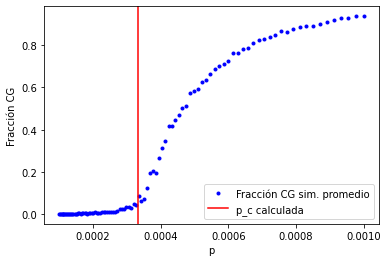

In [102]:
values= pd.DataFrame(p_vect,columns=['p'])
values['S']=sizeGC
result= values.groupby(['p'], as_index=False).agg({'S':['mean','std']})

plt.plot(result['p'],result['S']['mean'],'b.',label='Fracción CG sim. promedio')
plt.axvline(x=1/(n-1), color='red',label='p_c calculada')
plt.xlabel('p')
plt.ylabel('Fracción CG')
plt.legend()
plt.show()

Se observa un cambio de comportamiento en la p crítica calculada anteriormente.

## Comparacion con el punto 3d.

In [104]:
def ErdosRenyi_nComponentes(n,p):
    red=nx.empty_graph(n)
    red.add_edges_from(ErdosRenyi_edges(n,p))
    componentes=[red.subgraph(componente) 
                      for componente in sorted(nx.connected_components(red), 
                                               key=len, reverse=True)]
    del red
    nComponentes= len(componentes)
    del componentes
    return(nComponentes)

In [120]:
p=10**(-3)
n_vect=np.arange(3000,12000,1000)
nComponentes=[]
for n in tqdm(n_vect):
    nComponentes.append(ErdosRenyi_nComponentes(n,p))
    percent_used = getattr(psutil.virtual_memory(), 'percent')
    if percent_used > 80: print('breaking');break

100%|██████████| 45/45 [01:58<00:00,  2.64s/it]


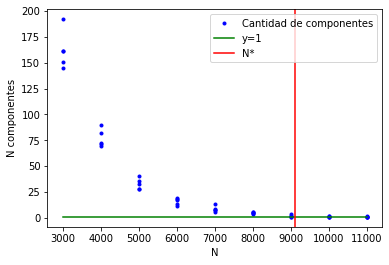

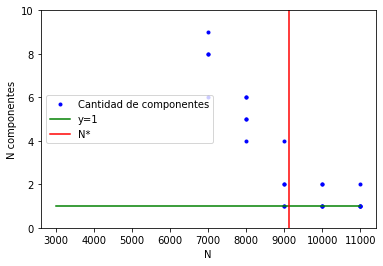

In [123]:
plt.plot(n_vect,nComponentes,'b.',label='Cantidad de componentes')
plt.plot(n_vect,1+n_vect*0,'g-',label='y=1')
plt.axvline(x=9120, color='red',label='N*')
plt.xlabel('N')
plt.ylabel('N componentes')
plt.legend()
plt.show()

plt.plot(n_vect,nComponentes,'b.',label='Cantidad de componentes')
plt.plot(n_vect,1+n_vect*0,'g-',label='y=1')
plt.axvline(x=9120, color='red',label='N* calculado')
plt.xlabel('N')
plt.ylabel('# componentes')
plt.ylim([0,10])
plt.legend()
plt.show()

Podemos ver que a medida que N crece,la cantidad de componentes separados desciende rapidamente a 1. 

Vamos a ver qué pasa en la zona mas cercana al N* encontrado y tomando mas muestras.

In [156]:
p=10**(-3)
n_vect=np.arange(8000,20000,1000)
n_vect = np.repeat(n_vect,50)
nComponentes=[]
for n in tqdm(n_vect):
    nComponentes.append(ErdosRenyi_nComponentes(n,p))
    percent_used = getattr(psutil.virtual_memory(), 'percent')
    if percent_used > 80: print('breaking');break

  1%|          | 4/600 [00:13<32:42,  3.29s/it]


KeyboardInterrupt: 

Es importante notar que lo que queremos ver es cuantas veces la red llega a tener una unica componente para cada N, con lo cual queremos agrupar por N y promediar la cantidad de veces que fue tuvo una solo componente.

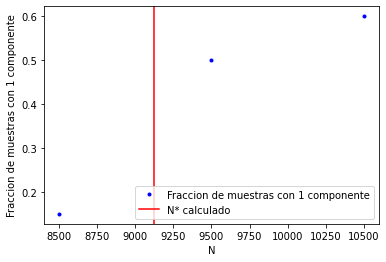

In [153]:
values= pd.DataFrame(n_vect,columns=['n'])
values['nComponentes']=nComponentes
values['is1']=values['nComponentes']==1
result= values.groupby(['n'], as_index=False).agg({'is1':['mean','std']})
plt.plot(result['n'],result['is1']['mean'],'b.',label='Fraccion de muestras con 1 componente')
plt.axvline(x=9120, color='red',label='N* calculado')
plt.xlabel('N')
plt.ylabel('Fraccion de muestras con 1 componente')
plt.legend()
plt.show()

De aca vemos que no alcanza con tomar $N^*=9120$ si queremos asegurar que siempre va a haber una unica componente conectada, pero podemos dar una idea de la proporcion de veces que va a haber una unica componente conectada para cada N. Podriamos asegurar por ejemplo que para $N > 10500$ en el 60% de las veces vamos a tener 1 sola componente.